In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d
from matplotlib.gridspec import GridSpec
from astropy.modeling import models, fitting



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

implementing errorbars for APEC models using an MC.

In [2]:
from  xspec import *

In [3]:
#doing trappist-1 as a test, and as I want to update the SED

kts = np.array([0.2, 0.4])
ktes = np.array([0, 0])
norms = np.array([0.35, 0.07])*1e-4
normes = np.array([0.2,0.02])*1e-4



Model apec<1>*phabs<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   apec       kT         keV      1.00000      +/-  0.0          
   2    1   apec       Abundanc            1.00000      frozen
   3    1   apec       Redshift            0.0          frozen
   4    1   apec       norm                1.00000      +/-  0.0          
   5    2   phabs      nH         10^22    1.00000      +/-  0.0          
________________________________________________________________________


Model apec<1>*phabs<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   apec       kT         keV      0.200000     +/-  0.0          
   2    1   apec       Abundanc            0.400000     frozen
   3    1   apec       Redshift            0.0          frozen
   4    1   apec       norm                3.50000E-05  +/-  0.0          
   5    2   phabs      nH         10^22    1.00000E-03  +/-  0.0          
__

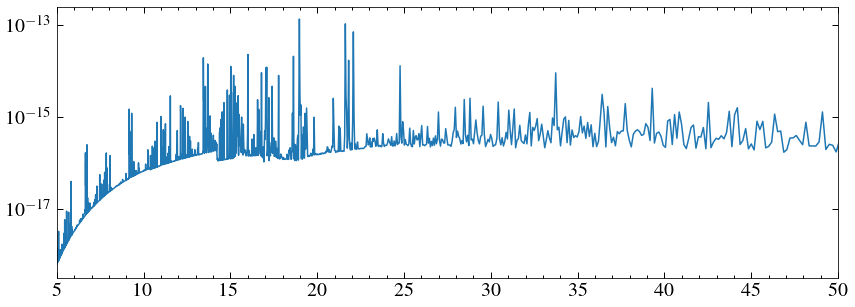

In [22]:
mod = Model('apec*phabs', setPars={1:kts[0], 2:0.4, 4:norms[0], 5:1e-3})
Plot.xAxis = "angstrom"
Plot.perHz = False
Plot.area=True
fluxnum = mod.flux[0]
AllModels.setEnergies("0.1 2.5 2400")
Plot("model")
xVals = Plot.x()
yVals = Plot.model()
wx = xVals*u.AA
fx  = (yVals * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
plt.plot(wx, fx)
plt.xlim(5, 50)
plt.yscale('log')
plt.show()

In [15]:
mod = Model('phabs*(apec+apec)', setPars={1:1e-3, 2:kts[0], 3:0.4, 5:norms[0], 6:kts[1], 7:0.4, 9:norms[1]})
Plot.xAxis = "angstrom"
Plot.perHz = False
Plot.area=True
fluxnum = mod.flux[0]
AllModels.setEnergies("0.1 2.5 2400")
Plot("model")
xVals = Plot.x()
yVals = Plot.model()
wx = xVals*u.AA
fx  = (yVals * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
plt.plot(wx, fx)
plt.xlim(5, 50)
plt.show()


Model phabs<1>(apec<2> + apec<3>) Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Model phabs<1>(apec<2> + apec<3>) Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000E-03 

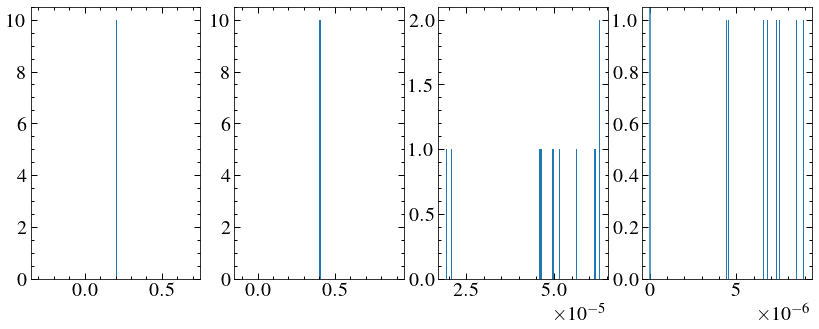

In [35]:
nsteps = 10
kt1s = np.random.normal(kts[0], ktes[0], nsteps)
plt.subplot(141)
plt.hist(kt1s, bins=100)

kt2s = np.random.normal(kts[1], ktes[1], nsteps)
plt.subplot(142)
plt.hist(kt2s, bins=100)

norm1s = np.random.normal(norms[0], normes[0], nsteps)
plt.subplot(143)
plt.hist(norm1s, bins=100)

norm2s = np.random.normal(norms[1], normes[1], nsteps)
plt.subplot(144)
plt.hist(norm2s, bins=100)
plt.axvline(0)



Model phabs<1>(apec<2> + apec<3>) Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Model phabs<1>(apec<2> + apec<3>) Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000E-03 

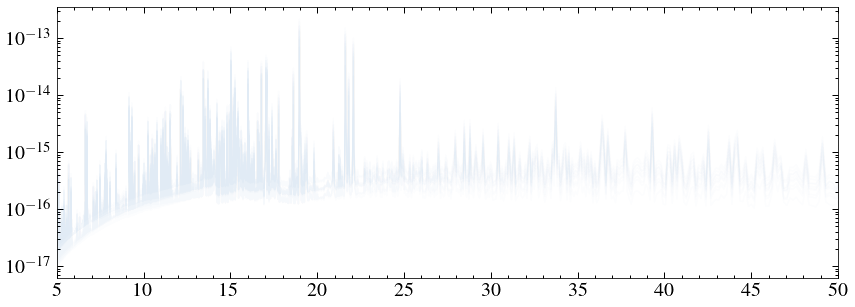

2400


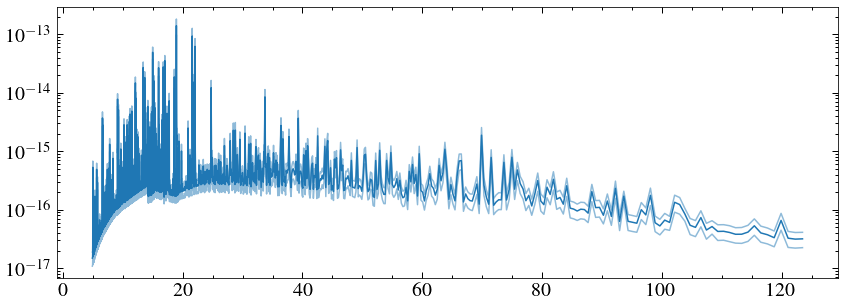

In [42]:
nsteps = 10
i = 0
kt1s = np.random.normal(kts[0], ktes[0], nsteps)
kt2s = np.random.normal(kts[1], ktes[1], nsteps)
norm1s = np.random.normal(norms[0], normes[0], nsteps)
norm2s = np.random.normal(norms[1], normes[1], nsteps)
# print(len(norm2s[norm2s < 0]))

fluxes = []

while i < nsteps:
    if kt1s[i] > 0 and kt2s[i] >0 and norm1s[i] > 0 and norm2s[i] > 0: #some small amount go below 0
        mod = Model('phabs*(apec+apec)', setPars={1:1e-3, 2:kt1s[i], 3:0.4, 5:norm1s[i], 6:kt2s[i], 7:0.4, 9:norm2s[i]})
        Plot.xAxis = "angstrom"
        Plot.perHz = False
        Plot.area=True
        fluxnum = mod.flux[0]
        AllModels.setEnergies("0.1 2.5 2400")
        Plot("model")
        xVals = Plot.x()
        yVals = Plot.model()
        wx = xVals*u.AA
        fx  = (yVals * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
        plt.plot(wx, fx, alpha=0.01, c='C0')
        fluxes.append(fx.value)
    i +=1
plt.xlim(5, 50)
plt.yscale('log')
plt.show()

# print(len(wx))

flux = np.mean(fluxes, axis=0)
flux_err = np.std(fluxes, axis=0)
print(len(flux))
plt.plot(wx, flux)
plt.plot(wx, flux+flux_err, c='C0', alpha=0.5)
plt.plot(wx, flux-flux_err, c='C0', alpha=0.5)
plt.yscale('log')


Moving to a script as I don't know how to turn off the printout